In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

For each test, the mean gflops are computed, grouping the observations by size and by the number of threads. The results are then plotted in a line plot, with the number of threads or the size on the x-axis and the mean gflops on the y-axis.

# Size scaling
## EPYC nodes - single precision

The theoretical peak performance can be computed as:
$$Flops_{peak} = n_{cores} \times frequency \times (\frac{FLOP}{cycle})$$

- $n_{cores} = 64$
- $frequency = 2.6$ GHz
- AMD Epyc 7H12 can reach at most $\frac{FLOP}{cycle} = 36$ operations per second regarding the floating point operations and $\frac{FLOP}{cycle} = 16$ operations per second for the double precision operations.

In [2]:
def get_summary(path = 'results/size_scaling/', lib = 'mkl', node = "EPYC", precision = "float", policy = "spread"):
    ''' 
    Get summary of size scaling results
    '''
    data_path = f"{path}size_scaling_{node}_{lib}_{precision}_{policy}.csv"
    data = pd.read_csv(data_path)
    summary = data.groupby(['size']).mean('gflops').reset_index()
    return summary

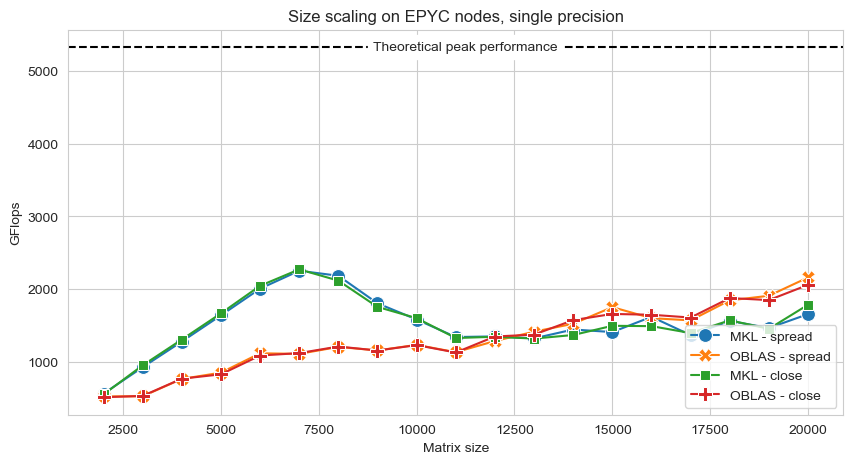

In [3]:
node = 'EPYC'
precision = 'float'

policy = 'spread'
sc_mkl_float_spread = get_summary(
    path='results/size_scaling/', 
    lib = 'mkl',
    node=node, 
    precision=precision, 
    policy=policy
)
sc_oblas_float_spread = get_summary(
    path='results/size_scaling/', 
    lib = 'oblas',
    node=node, 
    precision=precision, 
    policy=policy
)

policy = 'close'
sc_mkl_float_close = get_summary(
    path='results/size_scaling/', 
    lib = 'mkl',
    node=node, 
    precision=precision, 
    policy=policy
)
sc_oblas_float_close = get_summary(
    path='results/size_scaling/',
    lib = 'oblas',
    node=node,
    precision=precision,
    policy=policy
)

# for the legend:
sc_mkl_float_spread['test'] = 'MKL - spread'
sc_oblas_float_spread['test'] = 'OBLAS - spread'
sc_mkl_float_close['test'] = 'MKL - close'
sc_oblas_float_close['test'] = 'OBLAS - close'

sc_epyc_float = pd.concat([
    sc_mkl_float_spread, 
    sc_oblas_float_spread, 
    sc_mkl_float_close, 
    sc_oblas_float_close
    ])

plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
sns.lineplot(x='size', y='gflops', hue='test', data=sc_epyc_float, markers=True, markersize=10, style='test', dashes=False).axhline(y=5324.8, color='black', linestyle='--')
plt.text(x=11250, y=5324.8, s='Theoretical peak performance', va='center', ha='center', backgroundcolor='w')
plt.title(f"Size scaling on {node} nodes, single precision")
plt.ylabel('GFlops')
plt.xlabel('Matrix size')
plt.legend(loc='lower right', title='')
plt.show()

None of the libraries reaches the theoretical peak performance.

OBLAS shows better results with bigger matrices, while MKL seem better with small matrices.

Changing binding policy doesn't seem to do much.

## EPYC nodes - double precision

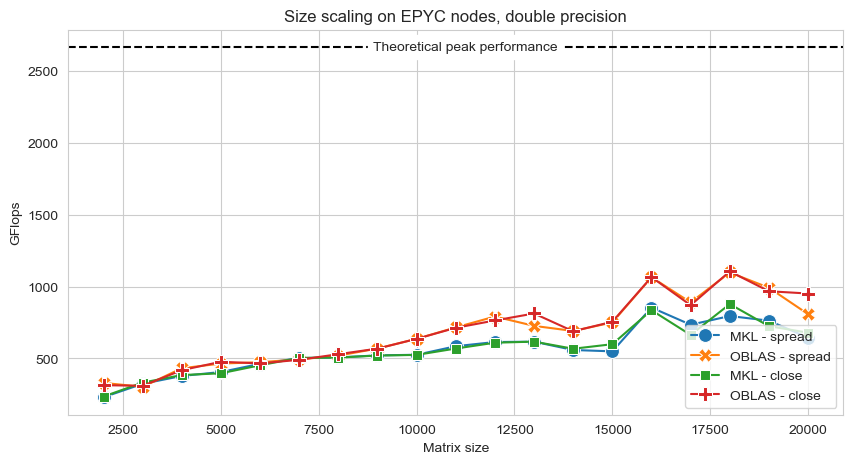

In [4]:
node = 'EPYC'
precision = 'double'

policy = 'spread'
sc_mkl_double_spread = get_summary(
    path='results/size_scaling/', 
    lib = 'mkl',
    node=node, 
    precision=precision, 
    policy=policy
)
sc_oblas_double_spread = get_summary(
    path='results/size_scaling/', 
    lib = 'oblas',
    node=node, 
    precision=precision, 
    policy=policy
)

policy = 'close'
sc_mkl_double_close = get_summary(
    path='results/size_scaling/', 
    lib = 'mkl',
    node=node, 
    precision=precision, 
    policy=policy
)
sc_oblas_double_close = get_summary(
    path='results/size_scaling/',
    lib = 'oblas',
    node=node,
    precision=precision,
    policy=policy
)

# For the legend:
sc_mkl_double_spread['test'] = 'MKL - spread'
sc_oblas_double_spread['test'] = 'OBLAS - spread'
sc_mkl_double_close['test'] = 'MKL - close'
sc_oblas_double_close['test'] = 'OBLAS - close'

sc_epyc_double = pd.concat([
    sc_mkl_double_spread,
    sc_oblas_double_spread,
    sc_mkl_double_close,
    sc_oblas_double_close
])

plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
sns.lineplot(x='size', y='gflops', hue='test', data=sc_epyc_double, markers=True, markersize=10, style='test', dashes=False).axhline(y=2662.4, color='black', linestyle='--')
plt.text(x=11250, y=2662.4, s='Theoretical peak performance', va='center', ha='center', backgroundcolor='w')
plt.title(f"Size scaling on {node} nodes, double precision")
plt.ylabel('GFlops')
plt.xlabel('Matrix size')
plt.legend(loc='lower right', title='')
plt.show()

Same considerations as before, but here MKL doesn't peak in performance with small matrices.

## THIN nodes - single precision

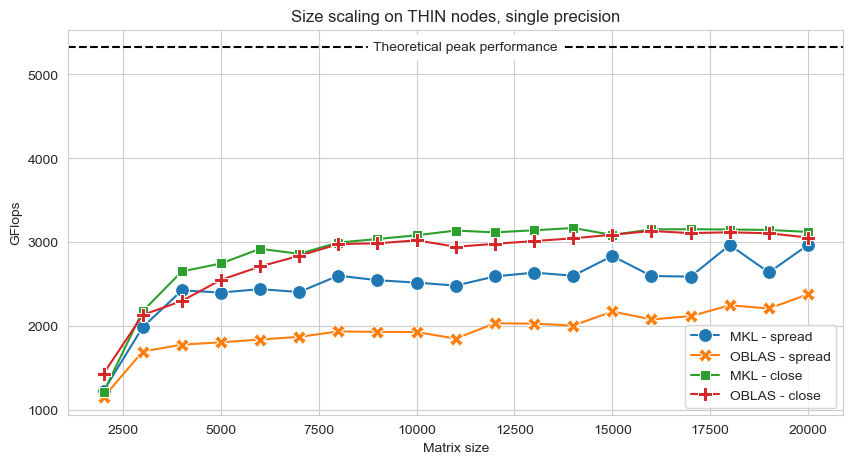

In [5]:
node = 'THIN'
precision = 'float'

policy = 'spread'
sc_mkl_float_spread = get_summary(
    path='results/size_scaling/', 
    lib = 'mkl',
    node=node, 
    precision=precision, 
    policy=policy
)
sc_oblas_float_spread = get_summary(
    path='results/size_scaling/', 
    lib = 'oblas',
    node=node, 
    precision=precision, 
    policy=policy
)

policy = 'close'
sc_mkl_float_close = get_summary(
    path='results/size_scaling/', 
    lib = 'mkl',
    node=node, 
    precision=precision, 
    policy=policy
)
sc_oblas_float_close = get_summary(
    path='results/size_scaling/',
    lib = 'oblas',
    node=node,
    precision=precision,
    policy=policy
)

# for the legend:
sc_mkl_float_spread['test'] = 'MKL - spread'
sc_oblas_float_spread['test'] = 'OBLAS - spread'
sc_mkl_float_close['test'] = 'MKL - close'
sc_oblas_float_close['test'] = 'OBLAS - close'

sc_thin_float = pd.concat([
    sc_mkl_float_spread, 
    sc_oblas_float_spread, 
    sc_mkl_float_close, 
    sc_oblas_float_close
    ])

plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
sns.lineplot(x='size', y='gflops', hue='test', data=sc_thin_float, markers=True, markersize=10, style='test', dashes=False).axhline(y=5324.8, color='black', linestyle='--')
plt.text(x=11250, y=5324.8, s='Theoretical peak performance', va='center', ha='center', backgroundcolor='w')
plt.title(f"Size scaling on {node} nodes, single precision")
plt.ylabel('GFlops')
plt.xlabel('Matrix size')
plt.legend(loc='lower right', title='')
plt.show()

## THIN nodes - double precision

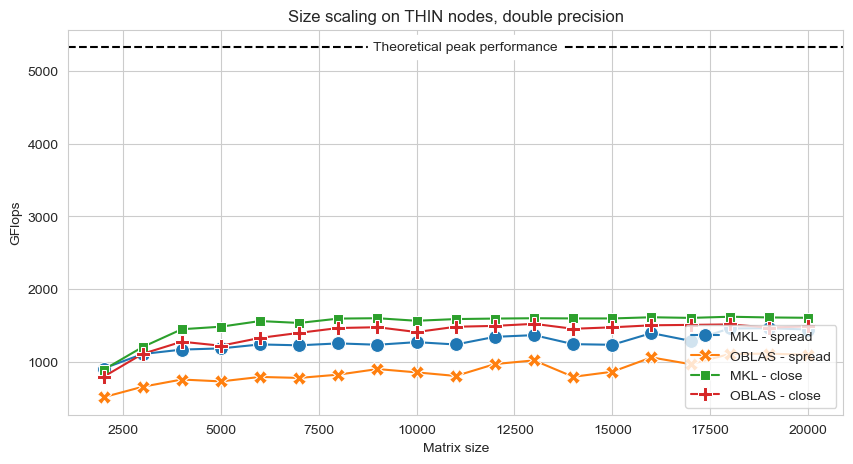

In [6]:
node = 'THIN'
precision = 'double'

policy = 'spread'
sc_mkl_float_spread = get_summary(
    path='results/size_scaling/', 
    lib = 'mkl',
    node=node, 
    precision=precision, 
    policy=policy
)

sc_oblas_float_spread = get_summary(
    path='results/size_scaling/', 
    lib = 'oblas',
    node=node, 
    precision=precision, 
    policy=policy
)


policy = 'close'
sc_mkl_float_close = get_summary(
    path='results/size_scaling/', 
    lib = 'mkl',
    node=node, 
    precision=precision, 
    policy=policy
)

sc_oblas_float_close = get_summary(
    path='results/size_scaling/',
    lib = 'oblas',
    node=node,
    precision=precision,
    policy=policy
)

# for the legend:
sc_mkl_float_spread['test'] = 'MKL - spread'
sc_oblas_float_spread['test'] = 'OBLAS - spread'
sc_mkl_float_close['test'] = 'MKL - close'
sc_oblas_float_close['test'] = 'OBLAS - close'

# merge dataframes
sc_thin_double = pd.concat([
    sc_mkl_float_spread, 
    sc_oblas_float_spread, 
    sc_mkl_float_close, 
    sc_oblas_float_close
])

plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
sns.lineplot(x='size', y='gflops', hue='test', data=sc_thin_double, markers=True, markersize=10, style='test', dashes=False).axhline(y=5324.8, color='black', linestyle='--')
plt.text(x=11250, y=5324.8, s='Theoretical peak performance', va='center', ha='center', backgroundcolor='w')
plt.title(f"Size scaling on {node} nodes, double precision")
plt.ylabel('GFlops')
plt.xlabel('Matrix size')
plt.legend(loc='lower right', title='')
plt.show()

# Core scaling

In [7]:
def core_summary(path = 'results/core_scaling/', lib = 'mkl', node = "EPYC", precision = "float", policy = "spread"):
    ''' 
    Get summary of size scaling results
    '''
    data_path = f"{path}core_scaling_{node}_{lib}_{precision}_{policy}.csv"
    data = pd.read_csv(data_path)
    summary = data.groupby(['size']).mean('gflops').reset_index()
    return summary